# Week 9 Monday


## Announcements
Midterm2 (closed book, closed computer) is a week from today. A sample midterm will be posted on Canvas.

HW8 (last HW) due Friday.

## Plan for this week: Unsupervised learning

Today: Dimension Reduction

Wednesday: Clustering 

Friday: Review + Brief introduction to final project

## Unsupervised learning -- Dimension Reduction: 

### Principal Component Analysis (PCA)

The fundamental difference with supervised learning is that in unsupervised learning problems, there is no label (response) $y$ to be predicted. All we have is the data matrix $X\in\mathbb{R}^{n\times p}$, and the general task is to explore the "pattern" of data.


**(unrigorous) Mathematical Description**: Given high-dimensional data observation $\mathbf{x}\in\mathbb{R}^{1\times p}$ (imagine it as one sample), find a "reasonable" projection function 

$$\mathbf{t}=\mathbf{h}(\mathbf{x}): \mathbb{R}^{1\times p}\to\mathbb{R}^{1\times k},k<<p$$ 

that "preserves" the high-dimensional information.

- A naive solution is to randomly pick $k$ component of $\mathbf{x}$-- of course there is huge waste of information.
- Another simple yet reasonable assumption is that $\mathbf{h}$ is linear transformation -- of course, the linear coefficients should depend on the "structure" of dataset. In other words, the "new coordinates" are the linear combination of "old coordinates".

$$\mathbf{t}=\mathbf{h}(\mathbf{x})=\mathbf{x}\mathbf{V}_{k}, \mathbf{V}_{k}\in\mathbb{R}^{p\times k}.$$ 

In data matrix form (n samples), we have

$$\mathbf{T}_{k}=\mathbf{X}\mathbf{V}_{k}\in\mathbb{R}^{n\times k}$$

Principal Component Analysis (PCA) is one typical linear dimension reduction method. Write $\mathbf{V}_{k}= [\mathbf{v}_1 \mathbf{v}_2 \cdots \mathbf{v}_k]$, then the column vectors $\mathbf{v}_j (1\leq j\leq k)$ are called the first k **Principal Components (PCs)** of the dataset, and $T_{k}$ is called the score matrix -- each row represents the $k$ scores of one sample in $k$ PCs -- they are the representation of the sample in $R^{k}$ space. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.


* Load `digits` dataset from `sklearn.datasets`

In [ ]:
import altair as alt
import pandas as pd
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y = True)

`digits` dataset consists of 8x8 pixel images of handwritten digits (from 0 to 9). Each image is represented as a 64-dimensional vector. Here is how the data looks like:

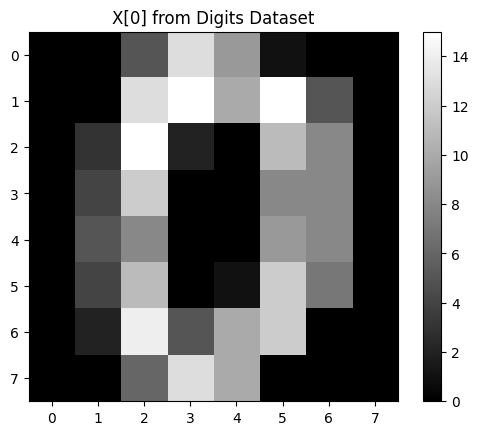

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title('X[0] from Digits Dataset')
plt.colorbar()
plt.show()

In [ ]:
X.shape

(1797, 64)

In [ ]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
y

array([0, 1, 2, ..., 8, 9, 8])

The `digits` dataset consists of images with 64 features (8x8 pixels). Each pixel is a dimension.

**Difficulty in Visualization**: Humans are good at visualizing in two or three dimensions. With 64 dimensions, it's impossible to visualize all the features simultaneously in a way that is meaningful to us.

* Visualize the data using two pixels

In [ ]:
df = pd.DataFrame(X, columns=[f'Pixel {i}' for i in range(X.shape[1])])
df['Digit'] = y
df.head(6)

Pixel 0  Pixel 1  Pixel 2  Pixel 3  Pixel 4  Pixel 5  Pixel 6  Pixel 7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   
5      0.0      0.0     12.0     10.0      0.0      0.0      0.0      0.0   

   Pixel 8  Pixel 9  ...  Pixel 55  Pixel 56  Pixel 57  Pixel 58  Pixel 59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   
5      0.0      0.0  ...       0.0       0.0       0.0       9.0      16.0   

   Pixel 60  Pixel 61  Pixel 62  Pixel 63  Digit  
0      10.0       0.0       0.0       0.0      0  
1      16.0      10.0       0.0       0.0      1  
2      11.0      16.0       9.0       0.0      2  
3      13.0       9.0       0.0       0.0      3  
4      16.0       4.0       0.0       0.0      4  
5      16.0      10.0       0.0       0.0      5  

[6 rows x 65 columns]

In [ ]:
alt.Chart(df).mark_circle(size = 60).encode(
    x = 'Pixel 2',
    y = 'Pixel 1',
    color = 'Digit:N',
    tooltip = ['Digit:N']
)

alt.Chart(...)

* Apply PCA to the `digits` dataset

By reducing dimensions to 2, we can plot the data points on a 2D plot. This makes it easier to see patterns, clusters, and outliers.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #reduce to 2 dims for visualization
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Digit'] = y
df_pca.head(5)

PC1        PC2  Digit
0  -1.259469  21.274877      0
1   7.957607 -20.768705      1
2   6.991927  -9.955976      2
3 -15.906106   3.332457      3
4  23.306864   4.269064      4

Each point represents a digit, colored based on its actual value, making it easier to see how digits are grouped in the reduced space.

In [ ]:
alt.Chart(df_pca).mark_circle(size = 60).encode(
    x = 'PC1',
    y = 'PC2',
    color = 'Digit:N',
    tooltip = ['Digit:N']
).interactive().properties(
    title = 'PCA of Digits Dataset'
)

alt.Chart(...)

* Check the fraction of the total variance captured by each principal component

The total variance is like the total information contained in the 64 original dimensions. Each principal component captures a part of this total variance. The first principal component captures the most variance, the second captures the next most, and so on.

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

### [t-distributed stochastic neighbor embedding (tSNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

tSNE is one of the most popular dimension reduction methods in current data science research. It is great for visualization of high-dimensional data, mainly because it alleviates the "crowding" problem in the low-dimensional embedding, by introducing the t-distribution kernel (heavier tail than gaussian). 

**Basic intuition**: The random walk on high-dimensional data should be similar to the random walk in the embedded low-dimensional space.

**How to do it**: Construct the transition probability matrices of random walk in high-dimensional (denoted by $P$, which is $n\times n$ matrix) and low-dimensional space (denoted by $Q$), with Gaussian and t-distribution kernels respectively. Note that $Q$ contains the variable $y_{1},...,y_{n}\in \mathbb{R}^{k}$, i.e. reduced coordinates. tSNE aims to find the best $y_{1},...,y_{n}\in\mathbb{R}^{k}$ that minimizes the "distance" (KL divergence) between $P$ and $Q$ -- using gradient descent.

A very cool website to guide the choice of parameters in tSNE can also be found [here](https://distill.pub/2016/misread-tsne/)

* Apply tSNE to the `digits` dataset

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1) #use all available CPU cores
X_tsne = tsne.fit_transform(X)

df_tsne = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df_tsne["Digit"] = y
df_tsne.head(5)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne1      tsne2  Digit
0 -63.425789   4.518676      0
1  -1.774301  -4.992983      1
2  22.790684   9.267468      2
3  16.649702  39.084774      3
4 -29.943394 -21.240732      4

In [ ]:
alt.Chart(df_tsne).mark_circle(size = 60).encode(
    x = 'tsne1',
    y = 'tsne2',
    color = 'Digit:N',
    tooltip = ['Digit:N']
).interactive().properties(
    title = 'tsne visualization of Digits Dataset'
)

alt.Chart(...)

There are many strategies in real applications of dimension reduction. For example, we can do dimension reduction in a sequential way.


Using PCA before t-SNE is a common technique, especially for very high-dimensional data. PCA can help to reduce noise and computational cost before applying t-SNE. 

In [ ]:
pca = PCA(n_components=0.8) #80% of total variance
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X_pca)
print(X_pca.shape)
print(X_tsne.shape)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
(1797, 13)
(1797, 2)


In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1','tsne2'])
df_tsne["Digit"] = y

alt.Chart(df_tsne).mark_circle(size = 60).encode(
    x = 'tsne1',
    y = 'tsne2',
    color = 'Digit:N',
    tooltip = ['Digit:N']
).interactive().properties(
    title = 'tsne after PCA visualization of Digits Dataset'
)


alt.Chart(...)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33a2f080-cfc7-4acc-827f-f8f4731780ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>